# Project

- The project is to create a notebook investigating the variables and
data points within the well-known iris flower data set associated
with Ronald A Fisher.
- In the notebook, you should discuss the classification of each
variable within the data set according to common variable types
and scales of measurement in mathematics, statistics, and Python.
- Select, demonstrate, and explain the most appropriate summary
statistics to describe each variable.
- Select, demonstrate, and explain the most appropriate plot(s) for
each variable.
- The notebook should follow a cohesive narrative about the data
set.

###### Source file: Iris – UCI Machine Learning Repository. Aug. 17, 2023. url: https://archive.ics.uci.edu/dataset/53/iris

## ATU -Fundamentals of Data Analysis, Winter 2023/24
##### Author: Norbert Antal

## **Investigating the Iris Dataset**

### **1. Introduction**

##### 1.1 Origins of the data
Fisher’s Iris data set, is a multivariate data set that was introduced by British statistician and biologist Ronald Fisher. <br>The data was collected by Edgar Anderson to quantify the morphologic variation of three related Iris flower species. Fisher utilised the data to demonstrate the use of linear discriminant analysis in his 1936 paper, published in the Annals of Eugenics; “The use of multiple measurements in taxonomic problems”.
<br>In recent times, the dataset is often used as a typical test case for statistical classification in machine learning.<br>


##### 1.2 Contents of the Iris dataset 
The Iris dataset contains 50 samples of three different Iris flower species: Iris setosa, Iris virginica, and Iris versicolor. Each sample has four features measured in centimetres: sepal length, sepal width, petal length and petal width. Using these four sets of data, Ronald Fisher developed a linear discriminant model to differentiate between the species.<br>

###### (ref Iris flower data: https://en.wikipedia.org/wiki/Iris_flower_data_set)

### **2. Preparation**

##### 2.1 Software used for this project

+ VS Code editor
+ Python version 3.9.13 with imported libraries:
  + *pandas* - for data manipulation and analysis 
  + *matplotlib.pyplot* - for creating graphical representation of data 
  + *seaborn* - also for graphical data representation with extended functionality and styling options
###### ref: Pandas: https://pandas.pydata.org/ <br> ref: Matplotlib: https://matplotlib.org/ <br> ref: Seaborn: https://seaborn.pydata.org/index.html
  
##### 2.2 Data source:
Source files downloaded from the UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/iris) and saved in the root folder for easy access.<br> The source file 'iris.data' is in a comma-separated value file format without headers, 'iris.names' is a brief description of the dataset which contains information regarding the headers for the data.

In [3]:
# load modules required for the notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



##### 2.3 Reading and validating data
Files 'iris.data' and 'iris.names' were copied to the project folder for easy access.
Data will be analysed using mainly Pandas which is a popular data analysis library in Python that provides user-friendly data structures and data analysis tools. The comma separated value file is converted to Pandas DataFrame which is a two-dimensional table with labelled columns and rows, similar to a spreadsheet. 
###### (ref: https://towardsdatascience.com/a-python-pandas-introduction-to-excel-users-1696d65604f6)

Iris flower measurement values are imported from **iris.data**, header labels added manually from the data description in **iris.names** and the two combined into a pandas dataframe. <br>

In [4]:
#----read in data and give headers to each column, creating a dataframe-----------------------
iris_source="iris.data" # path for source file
#----read in data and add headers to each column (headers taken from iris.names)--------------
headers=[ #listing headers for the data taken from iris.names file at "7. Attribute information"
    "sepal length (cm)", 
    "sepal width (cm)", 
    "petal length (cm)", 
    "petal width (cm)",
    "species"]
df=pd.read_csv(iris_source, names=headers) # creating dataframe 'df', setting headers
#df.head()

The resulting dataframe is checked for structure, anomalies such as missing or Null entries or unsuitable data formats and general information on its structure.

###### ref pandas.DataFrame.dtypes (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)<br> ref pandas.DataFrame.info: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html <br> ref pandas.DataFrame.head: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html


In [5]:
# ---- Data Validation -------------
# check for anomalies and dataframe structure
# ref: https://www.tutorialspoint.com/exploratory-data-analysis-on-iris-dataset
def fn_datavalidation(): 
    print("\n-------> dataframe info: \n")
    print(df.info()) #outputs column names, count of non-null values and datatypes
    print("\n-------> dataframe structure: \n")
    print(df.head(3)) # first 3 lines of data
    print("\n-------> Checking for Null entries: \n")
    print(df.isnull().sum()) #outputs the number of null entries in the dataframe
    print("\n")
#-------------------------end of function
fn_datavalidation()


-------> dataframe info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

-------> dataframe structure: 

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

       species  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  

-------> Checking for Null entries: 

sepal length (cm) 

- The generated dataframe information indicates that the dataframe contains 150 value entries per column, 4 columns contain numeric floating point data and one contains textual (string) data while there is an added index column that is assigned by pandas automatically when creating the dataframe. <br>
- Output under the 'dataframe structure' section confirms the assigned column labels to be corresponded with the source, floating point data are under flower measurements and species names are under species.
- In the subsequent check "Checking for Null entries", it was found that there are no Null entries in the dataframe.
Null entries can cause unexpected results with calculations, comparison of data and pandas functions. 

###### ref: Pandas indexing: ref: https://blog.hubspot.com/website/pandas-indexing <br> ref: Dealing with Null values: https://medium.com/geekculture/dealing-with-null-values-in-pandas-dataframe-1a67854fe834

### 3. Classification of variables in the Iris flower dataset
> ######  ...discuss the classification of each variable within the data set according to common variable types and scales of measurement in mathematics, statistics, and Python

#### 3.1 Pandas/python data categories

In section 2.3 pandas at 'dataframe info:' output the df.info() function returned pandas datatypes for each variables.

- sepal length (cm)  -    float64
- sepal width (cm)   -    float64
- petal length (cm)  -    float64
- petal width (cm)   -    float64
- species            -    object 
  
'object' is the pandas equivalent to python's 'string' datatype. It is the most general datatype and can contain both numbers (as characters) and strings (text)<br>
'float64' is a pandas datatype for numeric data and it is automatically assigned to columns that contain numeric characters with decimal point and/or NaN values

###### ref: Data Analysis and Visualization in Python for Ecologists, Data Types and Formats (https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format.html)

#### 3.2 Statistical categories

1. Categorical Variables:

Categorical variables represent categories or labels. In the Iris dataset, the species of iris flowers (Setosa, Versicolor, and Virginica) are categorical variables.
These variables are non-numeric, qualitative, nominal type, containing textual (string) data with descriptive information that cannot be measured but can be used to categorise or establish group affiliation and often, as in this case; mutually exclusive.

2. Numerical Variables:

Numerical variables represent quantities or measurements. In the Iris dataset, the four measurements (sepal length, sepal width, petal length, and petal width) are numerical variables represented as floating point data.<br>
This data is Quantitative containing numerical information that can be measured. It is also Continuous type for the data can be represented as real numbers. Furthermore, the data is a Ratio type. Although there are equal intervals between consecutive values similarly to Interval type data, these measurements can't have negative values, there is a true zero point therefore these are Ratio type data.

###### ref: Types of data & the scales of measurement, UNSW, Sydney 2020 (https://studyonline.unsw.edu.au/blog/types-of-data#:~:text=Properties%20and%20scales%20of%20measurement,to%20properly%20analyse%20the%20data) <br> ref: Types of Data in Statistics (https://www.freecodecamp.org/news/types-of-data-in-statistics-nominal-ordinal-interval-and-ratio-data-types-explained-with-examples/)

### 4. Summary statistics

> ######  Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.


In descriptive statistics, summary statistics are used to summarize a set of observations, in order to communicate the largest amount of information as simply as possible. There are several ways to summarize data by a typical value  and measure how typical that value is in the data.<br>
Some measures that are commonly used to describe a dataset are measures of location or central tendency and measures of variability or dispersion.<br> Measures of central tendency include the mean, median and mode, while measures of variability include the standard deviation (or variance), the minimum and maximum values (range) and inter-quartile range.
<br>

**pandas describe()** function provides a statistical overview of each array with the following statistics:

- Count: The number of non-null values.
- Mean: the arithmetic mean, the sum of the values divided by the number of values.
- Std: The standard deviation quantifies the amount of variation or the average deviation from the mean
- Min: The minimum value in each array
- 25%: The first quartile (under which the first 25% of values falls)
- 50%: The median (50th percentile, the middle value in the data).
- 75%: The third quartile (75th percentile).
- Max: The maximum value in the array.

As default, the describe() function only runs on numeric values, however, with the *include='all'* parameter, category data is also part of the output with additional statistics more suitable for categorical data:
- unique: The number of unique values in the column.
- top: The most frequently occurring value in a categorical (non-numerical) column
- freq: The frequency of the top category also referred to as the mode value

###### ref: Pandas.describe() documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html<br> ref: pandas.describe() method: https://www.w3schools.com/python/pandas/ref_df_describe.asp <br> ref: Descriptive statistics: https://en.wikipedia.org/wiki/Summary_statistics <br> ref: Measures of Location and Spread: https://www.stat.berkeley.edu/~stark/SticiGui/Text/location.htm

In [6]:
#running .describe() on the dataframe including categorical data
df.describe(include='all') # to include categorical variables https://stackoverflow.com/questions/48997644/how-to-describe-columns-as-categorical-values


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


### 5. Data visualisation

> ###### Select, demonstrate, and explain the most appropriate plot(s) for each variable.

Data visualisation is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.
Tables can show a great deal of information in a structured way, but they can also overwhelm users that are simply looking for high-level trends, hence graphic representation of data *comes into the picture*. Data visualisation is a critical step in the data science process, helping teams and individuals convey data more effectively to colleagues and decision makers.

###### ref: What is data visualization?: https://www.ibm.com/topics/data-visualization#:~:text=Data%20visualization%20is%20the%20representation,that%20is%20easy%20to%20understand.

#### 5.1 Visualising quantitative continuous data - iris petal measurements

Visualizing quantitative continuous data, such as iris petal measurements, can be done using various types of plots and graphs to gain insights into the data's distribution, relationships, and patterns. 



histogram, box plot, scatter
ref: https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/

##### 5.1.1 Scatter plot 

Scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables. In the context of iris petal measurements the x-axis represents the sample count (by using the dataframe index) while the y-axis represents the measurement values.

###### ref: https://chartio.com/learn/charts/what-is-a-scatter-plot/

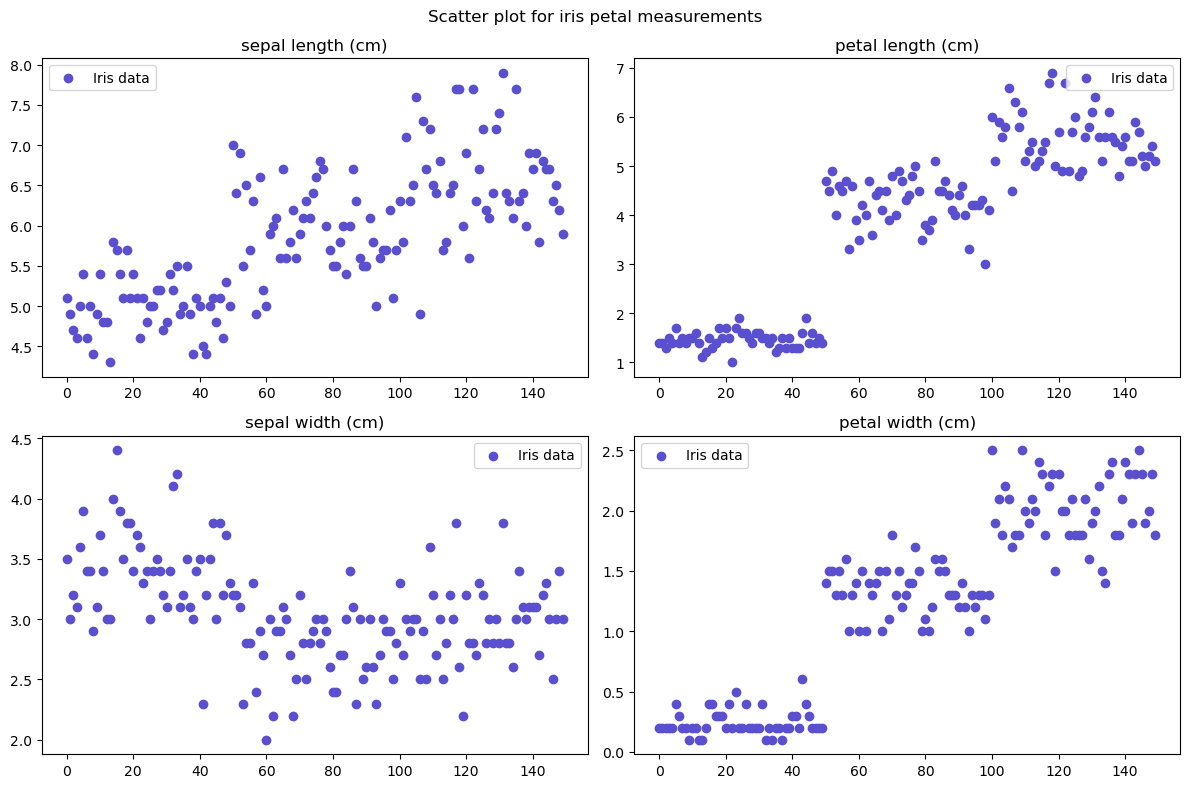

In [7]:
# Scatter plot for iris petal measurements
#c=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
c=df.columns # get column names
#set up plot for 4 charts
fig, axs = plt.subplots(2,2, figsize=(12,8))
fig.suptitle('Scatter plot for iris petal measurements',fontsize=12)
#set grid coordinates for looped subplots
rows=[0,1,0,1]
cols=[0,0,1,1]
#loop through numeric data and draw histogram + indicate mean
for i in range(4):
    mean = df[c[i]].mean() #get mean 
    # generate subplots and place them on predefined coordinates
    axs[rows[i],cols[i]].scatter(df.index, df[c[i]],label="Iris data",color='#5a4fcf')
    axs[rows[i],cols[i]].set_title(c[i])
    axs[rows[i],cols[i]].legend()

plt.tight_layout() #keep the text from overlapping
plt.show()

# ref: https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/
# ref creating multiple subplots: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

##### 5.1.2 Histogram

A histogram displays the shape and spread of continuous sample data. This graph plots a distribution of numbers using a bar chart (with no spaces between the bars), representing the quantity of data that falls within a particular range (bins). In the context of the iris dataset, histograms represent the distribution and variations of the samples for each measurement.

###### ref: https://chartio.com/learn/charts/what-is-a-scatter-plot/

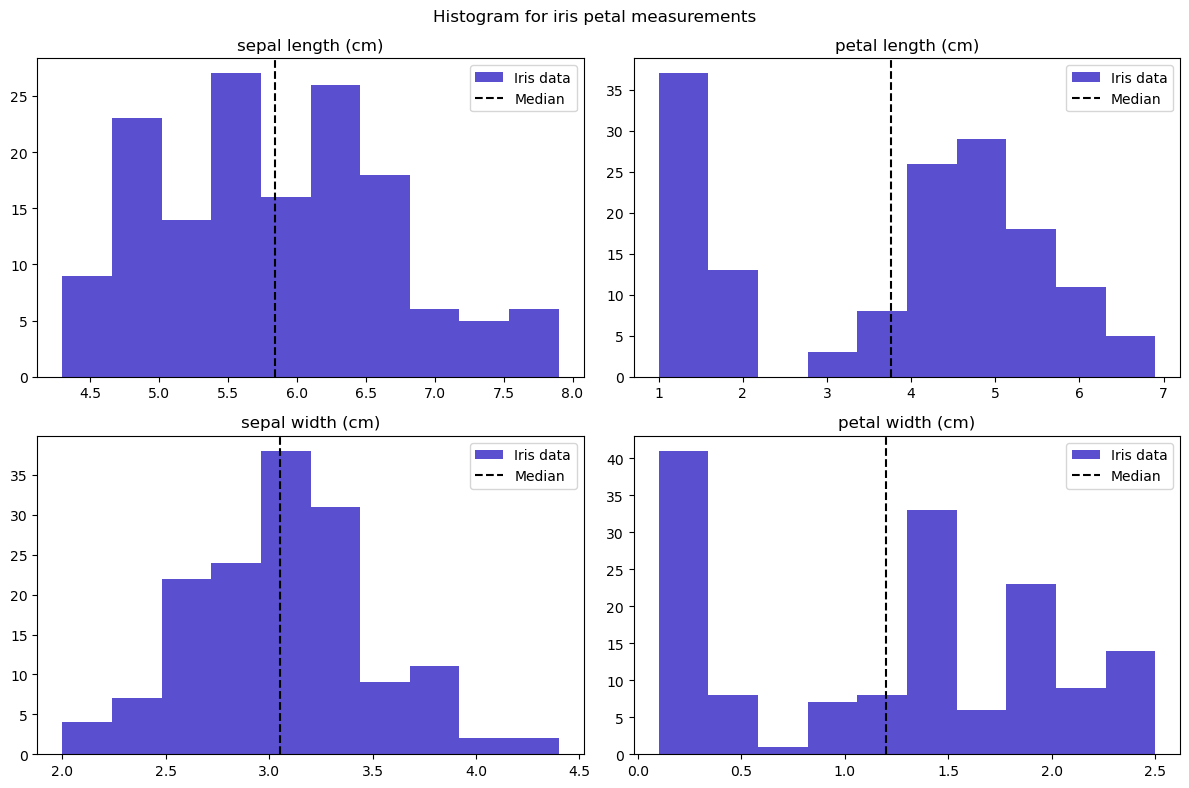

In [8]:
# Histogram for iris petal measurements
c=df.columns # get column names
#set up plot for 4 charts
fig, axs = plt.subplots(2,2, figsize=(12,8))
fig.suptitle('Histogram for iris petal measurements',fontsize=12)
#set grid coordinates for looped subplots
rows=[0,1,0,1]
cols=[0,0,1,1]
#loop through numeric data and draw histogram + indicate mean
for i in range(4):
    mean = df[c[i]].mean() #get mean 
    # generate subplots and place them on predefined coordinates
    axs[rows[i],cols[i]].hist(df[c[i]],bins=10,label="Iris data",color='#5a4fcf')
    axs[rows[i],cols[i]].set_title(c[i])
    axs[rows[i],cols[i]].axvline(mean, color="black", ls="--", label="Median")
    axs[rows[i],cols[i]].legend()

plt.tight_layout() #keep the text from overlapping
plt.show()

# ref get mean: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html
# ref matplotlib histograms: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# ref draw median: https://python-graph-gallery.com/basic-histogram-in-matplotlib/
# ref arranging multiple subplots: https://matplotlib.org/stable/users/explain/axes/arranging_axes.html


##### 5.1.2 Box plot 

A box-plot is a very useful and standardized way of displaying the distribution of data based on a five-number summary. It is also very helpful in identifying outliers. <br><br>
Anatomy:
+ Box: The box represents the interquartile range, containing the middle 50% of the data.
+ Median: The middle value represented with a line, dividing the data into two equal halves
+ Whiskers: Lines extending to the minimum and maximum values within a certain range.
+ Outliers: Individual data points beyond the whiskers depicted by dots or circles. The length of the whiskers is often determined by a multiplier (default is 1.5 times the IQR). Data points beyond the whiskers may be considered as potential outliers.

###### ref: https://chartio.com/learn/charts/what-is-a-scatter-plot/ <br> ref: http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html <br> ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

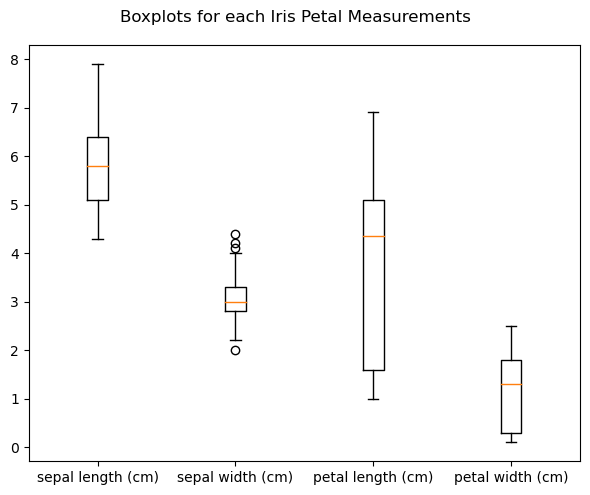

In [9]:
# Box plot for iris petal measurements
c = df.columns  # get column names
fig, ax = plt.subplots(figsize=(6, 5))
fig.suptitle('Boxplots for each Iris Petal Measurements', fontsize=12)

# Loop through numeric data and draw boxplot + indicate mean
for i in range(4):
    ax.boxplot(df[c[i]], positions=[i], labels=[c[i]])

plt.tight_layout()  # keep the text from overlapping
plt.show()

# ref: box plot: https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/
# ref: fit all box plots on one plot with separation (positions=[i]): https://stackoverflow.com/questions/35871627/matplotlib-boxplot-x-axis


##### 5.1.3 Pairs plot

A useful tool in Exploratory Data Analysis is the 'Pairs plot' that represents the pairwise relationships in a dataset. It is a matrix of multiple plots where each plot shows the relationship between a pair of variables. A pairs plot shows both distributions of a single variable and relationships between two variables.
By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

###### ref: Pair plots in R: https://medium.com/@ai.mlresearcher/pair-plots-in-r-140db6584ba#:~:text=To%20visualize%20relationships%20among%20variables,and%20relationships%20between%20two%20variables. <br> ref: Visualizing Data with Pairs Plots in Python: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

c:\Users\norbe\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


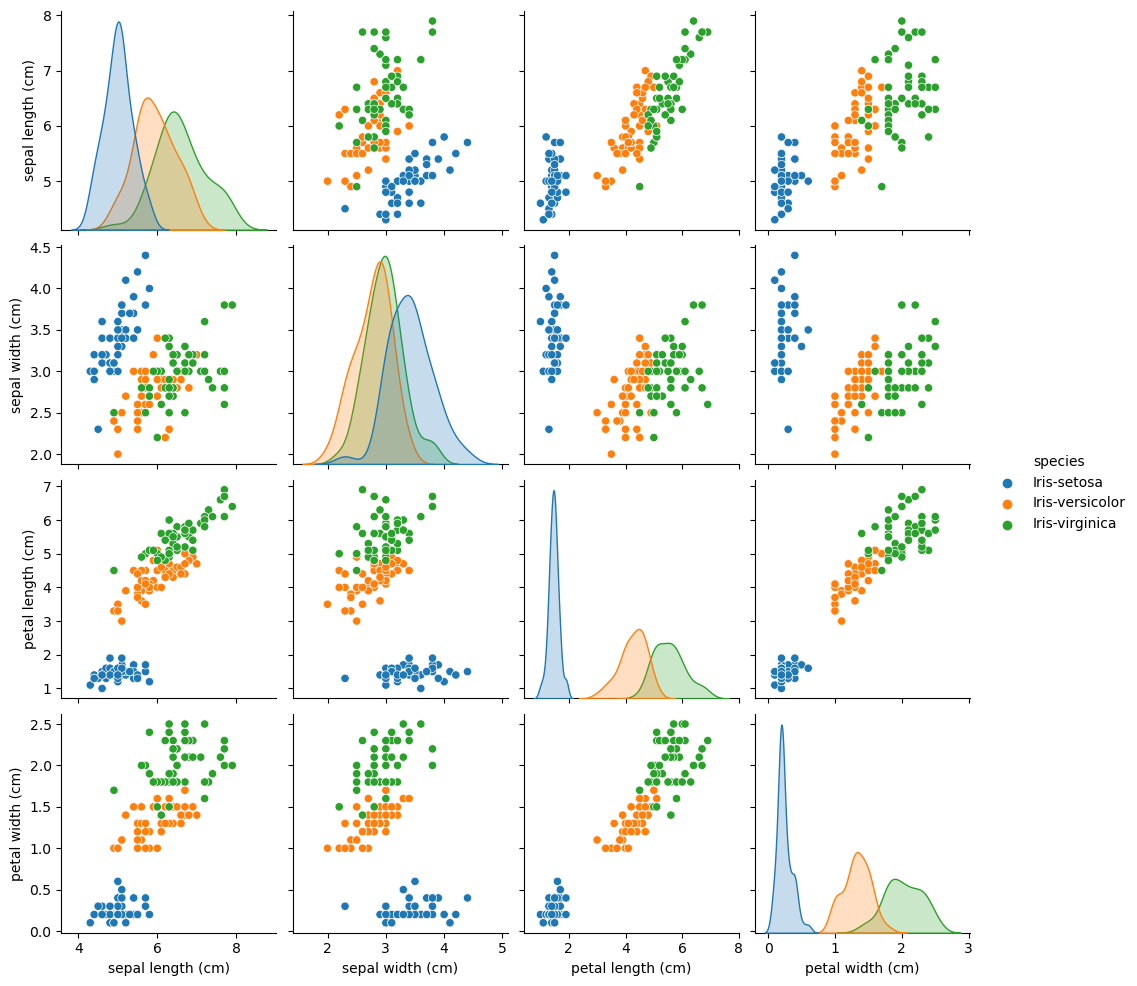

In [10]:
# draw pairs plot
sns.pairplot(df, hue="species")

#### 5.2 Categorical data


##### 5.2.1 Bar chart
A bar chart plots numeric values for levels of a categorical feature as bars. Levels are plotted on one chart axis, and values are plotted on the other axis. Each categorical value claims one bar, and the length of each bar corresponds to the bar’s value. Bars are plotted on a common baseline to allow for easy comparison of values.

###### ref: A Complete Guide to Bar Charts: https://chartio.com/learn/charts/bar-chart-complete-guide/

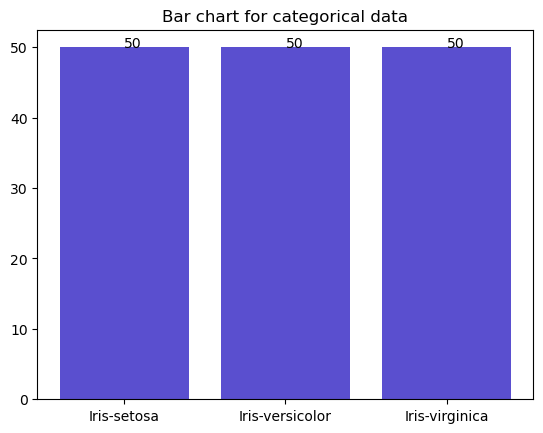

In [11]:
freq = df['species'].value_counts()
species = freq.index
plt.bar(species,freq, color='#5a4fcf')
plt.title('Bar chart for categorical data')
for i, f in enumerate(freq):
    plt.text(i, f,  str(f))
plt.show()

# ref get column labels https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html


##### 5.2.1 Pie chart
A pie chart (or a circle chart) is a circular statistical graphic which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice (and consequently its central angle and area) is proportional to the quantity it represents. 

###### ref: Pie Chart: https://en.wikipedia.org/wiki/Pie_chart

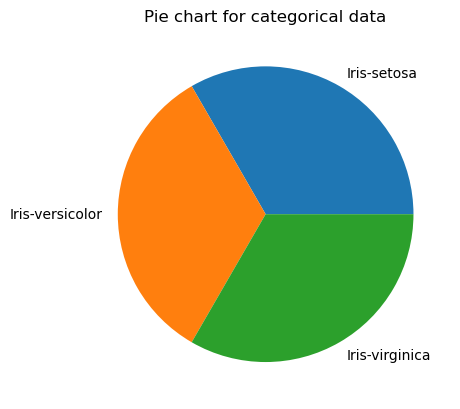

In [12]:
# draw pie chart for categorical variable 'species'
freq = df['species'].value_counts()
species = freq.index
plt.pie(freq,labels=species)
plt.title('Pie chart for categorical data')
plt.show()
#ref pie charts: https://www.w3schools.com/python/matplotlib_pie_charts.asp